In [87]:
%matplotlib inline

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal
from sklearn.datasets import make_swiss_roll

from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD
from sklearn.manifold import Isomap

# Dimensionality Reduction

In [89]:
points = multivariate_normal(mean=[0, 0], cov=[[1, 0], [0, 1]]).rvs(size=5000)

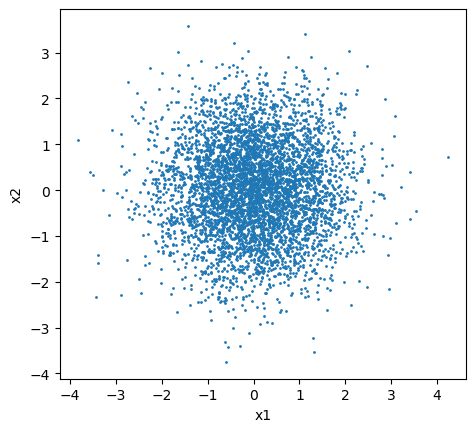

In [90]:
plt.scatter(points[:, 0], points[:, 1], s=1)
plt.xlabel("x1")
plt.ylabel("x2")


plt.gca().set_aspect("equal")
plt.show()

In [91]:
x_center = np.mean(points, axis=0)

In [92]:
centered_points = points - x_center

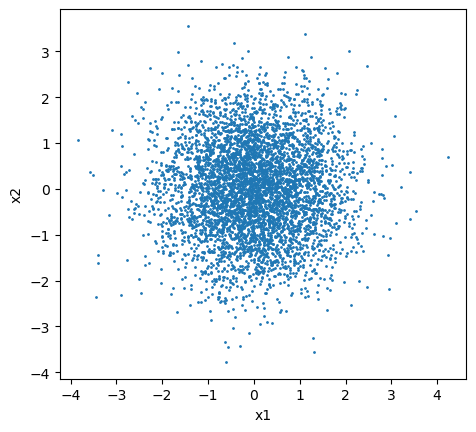

In [93]:
plt.scatter(centered_points[:, 0], centered_points[:, 1], s=1)
plt.xlabel("x1")
plt.ylabel("x2")

plt.gca().set_aspect("equal")
plt.show()

In [94]:
centered_points.mean(axis=0)

array([-4.30766534e-17, -3.35731443e-17])

In [95]:
covariance_matrix = np.cov(points[:, 0], points[:, 1])

In [96]:
covariance_matrix

array([[1.00944584e+00, 9.89321061e-04],
       [9.89321061e-04, 1.03814318e+00]])

In [97]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [98]:
eigenvectors[:, 0]

array([-0.9994077 ,  0.03441305])

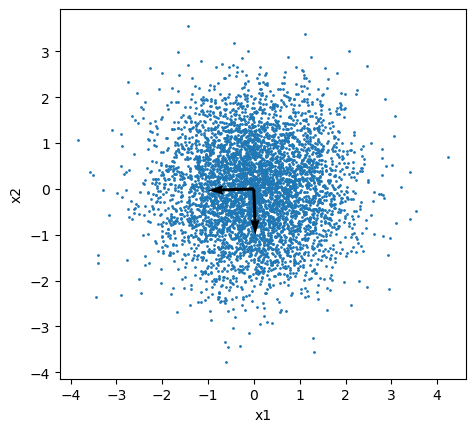

In [99]:
plt.scatter(centered_points[:, 0], centered_points[:, 1], s=1)
plt.quiver([0, 0], [0, 0], [eigenvectors[0][0], eigenvectors[1][0]], [eigenvectors[0][1], eigenvectors[1][1]], angles = "xy", scale_units = "xy", scale = 1)

plt.xlabel("x1")
plt.ylabel("x2")

plt.gca().set_aspect("equal")
plt.show()

In [100]:
np.dot(eigenvectors[:, 0], eigenvectors[:, 1])

-1.005381657441773e-18

In [101]:
np.linalg.inv(eigenvectors)

array([[-0.9994077 ,  0.03441305],
       [-0.03441305, -0.9994077 ]])

In [102]:
np.linalg.inv(eigenvectors) @ np.array([[eigenvalues[0], 0], [0, eigenvalues[1]]]) @ eigenvectors

array([[ 1.00944584e+00, -9.89321061e-04],
       [-9.89321061e-04,  1.03814318e+00]])

In [103]:
covariance_matrix

array([[1.00944584e+00, 9.89321061e-04],
       [9.89321061e-04, 1.03814318e+00]])

In [104]:
points @ (np.array([[eigenvalues[0], 0], [0, eigenvalues[1]]]) @ eigenvectors)

array([[-4.22342683e-01,  2.13318429e+00],
       [ 6.97625979e-01, -1.78573735e+00],
       [ 1.56088451e+00, -3.22529005e-01],
       ...,
       [-1.32998064e+00, -1.01901056e+00],
       [-4.40899913e-04,  2.38384942e-01],
       [ 2.18685531e+00, -9.21683010e-01]])

In [105]:
pca = PCA(n_components=1)

In [106]:
pca.fit(points)

PCA(n_components=1)

In [107]:
pca.components_

array([[-0.03441305, -0.9994077 ]])

In [108]:
eigenvectors

array([[-0.9994077 , -0.03441305],
       [ 0.03441305, -0.9994077 ]])

In [109]:
pca.explained_variance_

array([1.03817724])

In [110]:
eigenvalues

array([1.00941178, 1.03817724])

In [111]:
pca.explained_variance_ratio_

array([0.50702423])

In [112]:
transformed = pca.transform(points)

In [113]:
alg1 = Estimator(transformed)
alg2 = Estimator(poinst[:, 0])
alg3 = Estimator(points[:, 1])

NameError: name 'Estimator' is not defined

In [114]:
transformed

array([[ 2.08286209],
       [-1.6910178 ],
       [-0.28075399],
       ...,
       [-0.95437537],
       [ 0.25807754],
       [-0.85730363]])

In [124]:
kernel_pca = KernelPCA(n_components = 4, kernel = "rbf", degree = 3)

In [125]:
kernel_pca.fit_transform(points).shape

(5000, 4)

In [126]:
kernel_pca.fit_transform(points)

array([[-0.45698656, -0.01735603, -0.43609005, -0.41142435],
       [ 0.55839615, -0.07245128, -0.35728766, -0.45514859],
       [ 0.25369931, -0.5520914 , -0.24837451,  0.23979151],
       ...,
       [ 0.22184126,  0.581932  , -0.23685817,  0.39784791],
       [-0.20277089, -0.07679465,  0.52060491, -0.01689991],
       [ 0.2113219 , -0.28197342, -0.47017111,  0.06811821]])

In [127]:
kernel_pca.fit(points)

KernelPCA(kernel='rbf', n_components=4)

In [128]:
kernel_pca.transform(points)

array([[-0.45698656, -0.01735603, -0.43609005, -0.41142435],
       [ 0.55839615, -0.07245128, -0.35728766, -0.45514859],
       [ 0.25369931, -0.5520914 , -0.24837451,  0.23979151],
       ...,
       [ 0.22184126,  0.581932  , -0.23685817,  0.39784791],
       [-0.20277089, -0.07679465,  0.52060491, -0.01689991],
       [ 0.2113219 , -0.28197342, -0.47017111,  0.06811821]])

In [131]:
truncated_svd = TruncatedSVD(n_components=1)

In [132]:
truncated_svd.fit_transform(points)

array([[ 2.05217269],
       [-1.71578752],
       [-0.30099922],
       ...,
       [-0.98980806],
       [ 0.22962171],
       [-0.87425385]])

In [133]:
truncated_svd.explained_variance_

array([1.0379688])

In [152]:
swiss_roll = make_swiss_roll(n_samples=500)[0]

In [153]:
isomap = Isomap(n_neighbors=20)

In [154]:
isomap.fit(swiss_roll)

Isomap(n_neighbors=20)

In [155]:
result = isomap.transform(swiss_roll)

In [156]:
make_swiss_roll()

(array([[  5.80799239,   5.8454188 ,   3.61203119],
        [ -3.35317847,  13.89102136, -10.13582518],
        [  3.74167132,   3.67319539,  -3.98501784],
        [ -9.24127583,  11.59759143,   1.09907264],
        [  6.20319045,  19.29957102,  -0.41203481],
        [ -9.25439954,  15.27728159,  -3.04579952],
        [  6.30410598,   9.02233437,   0.14198933],
        [  6.30546026,  13.62124166,   0.15203963],
        [ -5.29901951,  16.99433517,  -9.02375718],
        [  1.20387175,  17.51961068,   7.602196  ],
        [ -5.98419539,   9.64463046,   6.20598738],
        [ -4.96794434,   4.11134514,   6.87229073],
        [ -2.07075844,   1.90557126,   7.84335553],
        [ -1.86234401,  17.57715236,   7.86899756],
        [  1.25362488,   2.42657811,  -4.80672477],
        [ 12.06830746,   3.57428318,   4.65344245],
        [ 12.33958502,   3.39611348,  -1.5736679 ],
        [  4.15418228,   0.68159493,   5.93349069],
        [ -4.19339698,   9.42302911,  -9.7226097 ],
        [ -9

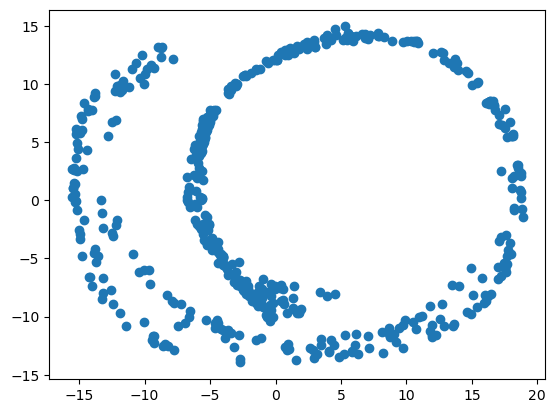

In [157]:
plt.scatter(result[:, 0], result[:, 1])
plt.show()